<a href="https://colab.research.google.com/github/GreggHeller1/Adult-Spine-Models/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

False


In [3]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/Adult-Spine-Models.git

In [4]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/Adult-Spine-Models
    
from src import data_io as io
from src import plotting as plot
from src import computation as comp

In [7]:
#imports
import xarray as xr
import pandas as pd
import numpy as np
import ipdb

from matplotlib import pyplot as plt
import os
from neuron import h, gui


21549 lines read


In [5]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/Adult-Spine-Models/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
print(os.path.exists(test_path))


soma_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_soma.mat"
spines_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_spines.mat"
print(os.path.exists(soma_path))
print(os.path.exists(spines_path))

demo_data/test.txt
/Users/Gregg/code/adult-spine-models/scripts
True
True
True


In [6]:
#data inputs
#io.readfile(test_path)
soma = io.loadmat(soma_path)
spine_data = io.loadmat(spines_path)
soma_data = soma

In [7]:
#data manipulation
spines = spine_data
print(soma[3])
print(spines['dend_cell'])

#print(np.shape(soma['soma_cell']))
#print(np.shape(spines['dend_cell']))



#print(soma['soma_cell'][0,3]._fieldnames)


<HDF5 dataset "dend_cell": shape (4, 11), type "|O">


In [8]:
#print(spines.keys())
#print(np.shape(soma[3]))
#print(soma[3].keys())


soma_field_2 = io._todict(soma[2])

ref = spines['dend_cell'][2,0]
spine_field_2 = spines[ref]#['DSI']

#print(np.array(field_2))
#print(field_2['vis_stim_times'])

#spines_f2 = 


In [9]:
print(spine_field_2['trial_traces'].shape)

(91, 10, 1, 16, 14)


In [10]:
soma_traces = np.array(soma_field_2['trial_traces'])
spine_traces = np.array(spine_field_2['trial_traces'][:,:,0,:,0].swapaxes(0,-1))

fovs = spine_data['dend_cell'][2,:].shape[0]
print(fovs)

print(soma_traces.shape)
print(spine_traces.shape)


#trial_amps = np.array(field_2['trial_amp'])
#print(trial_amps.shape)

11
(16, 10, 91)
(16, 10, 91)


In [11]:
soma_traces = comp.get_traces(soma_data)
spine_traces = comp.get_traces(spine_data)

In [12]:
soma_sub_traces = comp.select_timesteps(soma_traces)

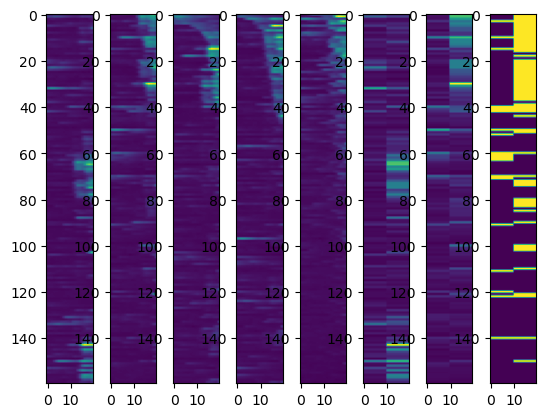

In [13]:
plot.plot_activity_plots(soma_sub_traces)

In [14]:
summed_spine_traces = comp.get_summed_spine_trace(spine_data)
sum_spine_sub_traces = comp.select_timesteps(summed_spine_traces)

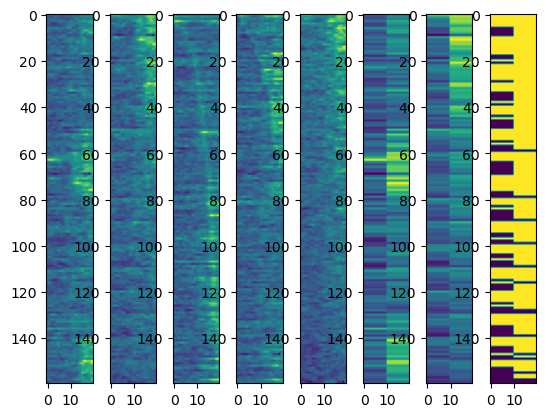

In [15]:
plot.plot_activity_plots(sum_spine_sub_traces)

In [17]:

summed_spine_traces = comp.get_summed_trial_sampled_spine_trace(spine_data)
sum_spine_sub_traces = comp.select_timesteps(summed_spine_traces)

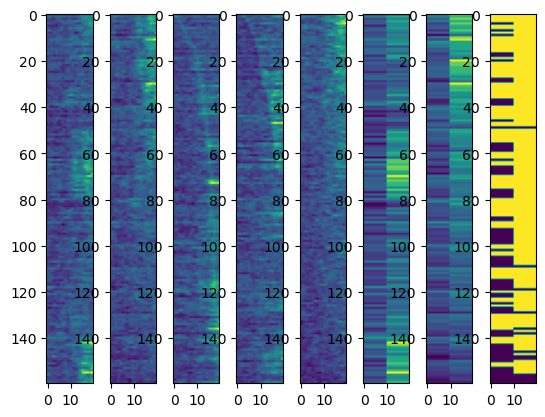

In [18]:
plot.plot_activity_plots(sum_spine_sub_traces)

In [19]:
spine_sub_traces = comp.select_timesteps(spine_traces)
print(spine_traces.shape)
print(spine_sub_traces.shape)

(16, 10, 91)
(16, 10, 20)


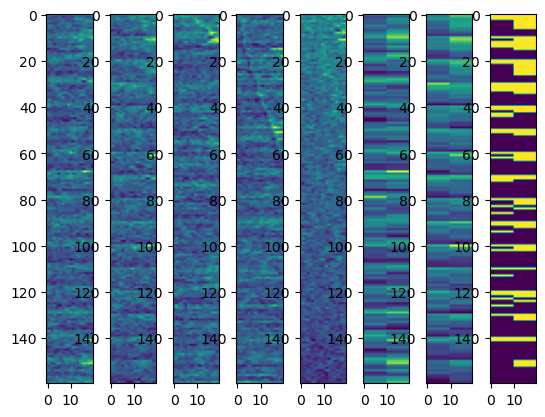

In [20]:
plot.plot_activity_plots(spine_sub_traces)

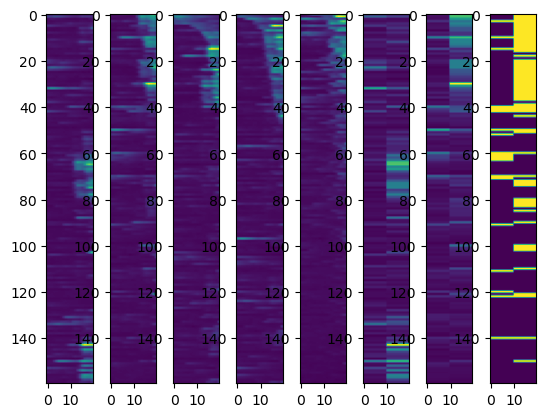

In [21]:
plot.plot_activity_plots(soma_sub_traces)

In [22]:
similarity_list, fov_num_list, spine_num_list = comp.get_most_similar_spine(soma_data, spine_data)
#spine_means, spine_means_sorted, spine_bool = plot.produce_activity_plots(best_match_traces)  

In [23]:
rank = 0
best_match_traces = comp.get_traces(spine_data, fov=fov_num_list[rank], spine_index=spine_num_list[rank])
best_match_traces = comp.select_timesteps(best_match_traces)

In [24]:
print(best_match_traces.shape)

(16, 10, 20)


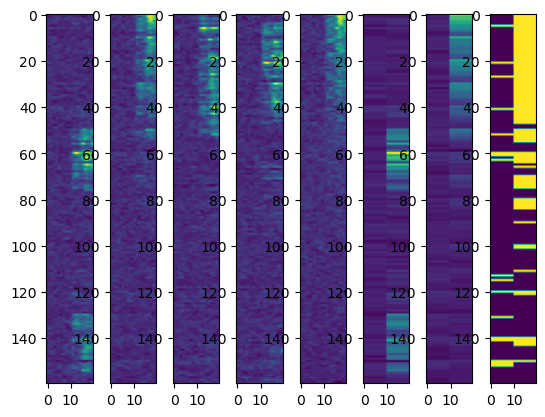

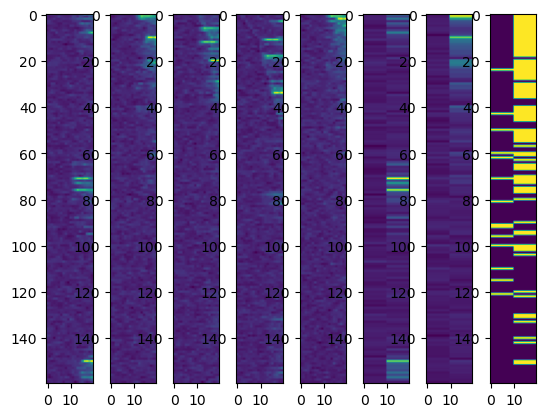

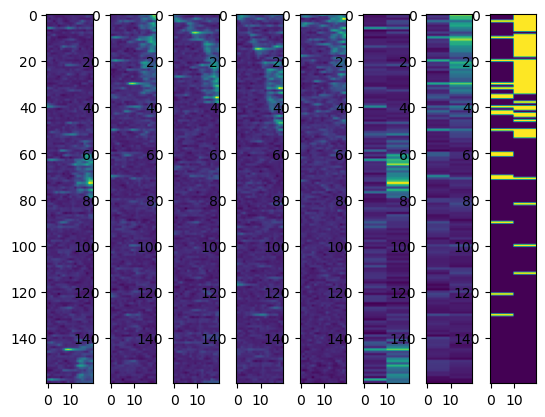

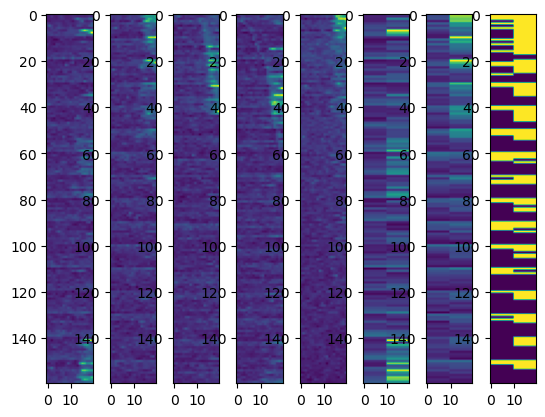

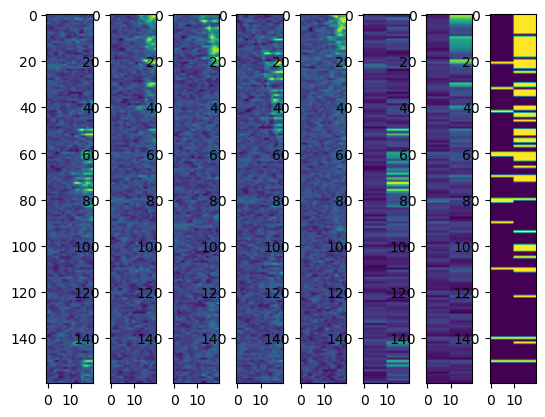

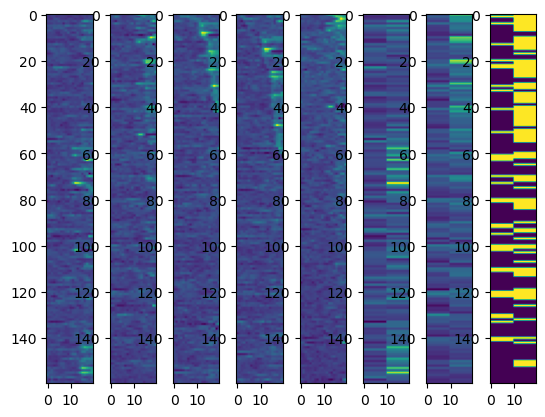

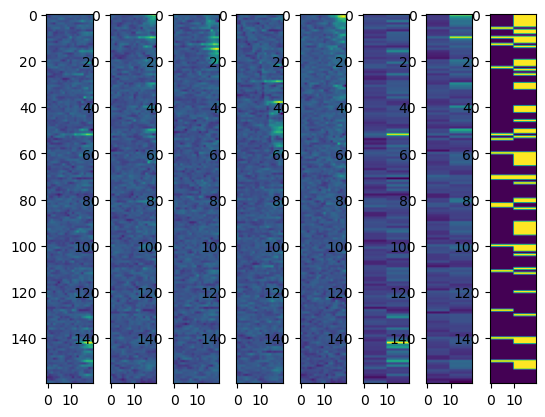

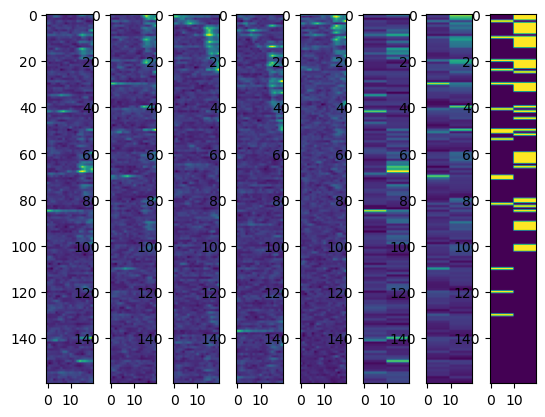

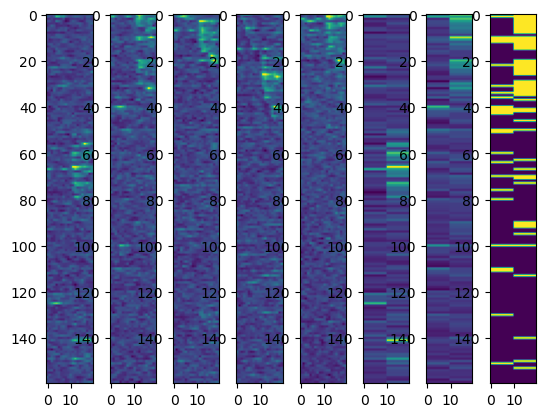

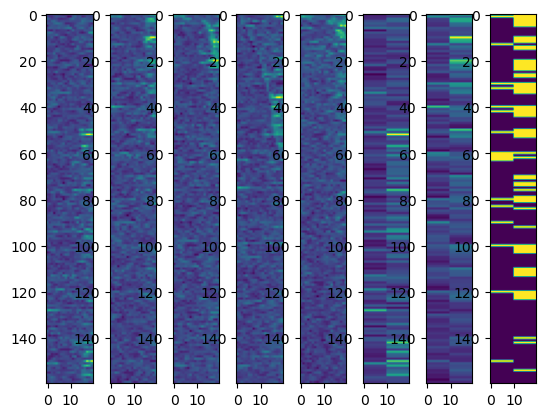

In [25]:
for rank in range(10):
    best_match_traces = comp.get_traces(spine_data, fov=fov_num_list[rank], spine_index=spine_num_list[rank])
    best_match_traces = comp.select_timesteps(best_match_traces)
    plot.plot_activity_plots(best_match_traces)

In [ ]:
stim_repeats = 10


np.random.randint(0,stim_repeats, (3,4,5))

In [ ]:
fov = 0
type(fov) is int